In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

import gc #garbage collector

# EDA


In [10]:
def load_data(url_file):
  df = pd.read_csv(url_file)
  return df

In [11]:
df_movies = load_data('movies_clean.csv')

In [12]:
df_movies["release_year"].max()

2021

In [13]:
df_movies.dtypes

type              object
title             object
director          object
cast              object
country           object
date_added        object
release_year       int64
rating            object
listed_in         object
description       object
id                object
platform          object
duration_int     float64
duration_type     object
mean_score       float64
dtype: object

In [14]:
url = 'out_ratings.csv'
df_ratings = load_data(url)

In [15]:
df_ratings.shape

(11024289, 4)

In [16]:
df_ratings.dtypes


userId         int64
rating       float64
timestamp      int64
movieId       object
dtype: object

In [17]:
df_ratings.head(5)

,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381
3,1,5.0,1425941546,ns3663
4,1,5.0,1425941556,as9500


In [18]:
# rating por userId
rating_count_user = df_ratings.groupby(['movieId']).count()
#rating_mean_user = df_ratings.groupby(['userId']).mean()

In [19]:
rating_count_user[rating_count_user.index == "as100"]

,userId,rating,timestamp
movieId,,,
as100,430,430,430


In [20]:
""" plt.hist(rating_mean_user["rating"], log= True)
plt.title('Promedio de rating por usuario')
plt.show() """

' plt.hist(rating_mean_user["rating"], log= True)\nplt.title(\'Promedio de rating por usuario\')\nplt.show() '

<Axes: >

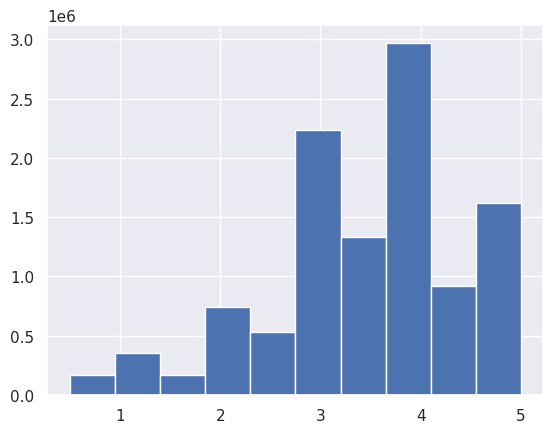

In [21]:
df_ratings['rating'].hist()

# Peliculas mas vistas


In [22]:
df1_by_movies = df_ratings.groupby(['movieId']).count()

In [23]:
df1_by_movies.sort_values('userId', ascending = False, inplace = True)

In [24]:
df1_by_movies.head(5)

,userId,rating,timestamp
movieId,,,
as4197,576,576,576
as9065,560,560,560
ns7279,558,558,558
as848,558,558,558
hs2360,556,556,556


In [25]:
df1_by_movies['views'] = df1_by_movies['userId']
df1_by_movies['movieId'] = df1_by_movies.index

In [26]:
df1_by_movies.drop(columns=['userId','rating','timestamp'], inplace = True)

In [27]:
df1_by_movies.reset_index(drop=True, inplace=True)

## Recuperamos el titulo por movieId

In [28]:
#row_to_update = df1_by_movies[df1_by_movies["movieId"]=="as4197"]

In [29]:
df1_by_movies.head(3)

,views,movieId
0,576,as4197
1,560,as9065
2,558,ns7279


# ML

In [30]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import Reader

In [31]:
reader = Reader(sep=',',rating_scale=(1, 5), skip_lines=1)
N_filas = 10000

In [32]:
df1_by_movies.head(5)

,views,movieId
0,576,as4197
1,560,as9065
2,558,ns7279
3,558,as848
4,556,hs2360


In [33]:
df_clean_movies = pd.read_csv('./movies_clean.csv')

In [34]:
df_clean_movies.head(3)

,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,id,platform,duration_int,duration_type,mean_score
0,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2030-03-21,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,amazon,113.0,min,3.467131
1,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2030-03-21,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,as2,amazon,110.0,min,3.548682
2,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2030-03-21,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,amazon,74.0,min,3.500000


In [62]:
#data = Dataset.load_from_df(df_movies[['type', 'title', 'director','rating']][:N_filas], reader)
# userId	rating	timestamp	movieId
data_surprise = Dataset.load_from_df(df=df_ratings[["userId", "movieId","rating",]], reader=reader)

KeyboardInterrupt: 

In [63]:
trainset, testset = train_test_split(data_surprise, test_size=.3)

In [65]:
from surprise import SVD
model = SVD()

In [38]:
model.fit(trainset)

In [39]:
predictions = model.test(testset)

In [40]:
predictions[2]

Prediction(uid=43227, iid='as4743', r_ui=4.5, est=3.308038249100212, details={'was_impossible': False})

In [81]:
model.predict(1328945,'as4743')

AttributeError: 'SVD' object has no attribute 'trainset'

In [43]:
# Tomaremos un usuario para hacerle una recomendación

usuario = 9992
rating = 4   # Tomamos películas a las que haya calificado con 4 o 5 estrellas
df_user = df_ratings[(df_ratings['userId'] == usuario) & (df_ratings['rating'] >= rating)]
df_user = df_user.reset_index(drop=True)

#df_user['title'] = df_clean_movies['title'].loc[df_user.movieId.values].values
df_user

,userId,rating,timestamp,movieId
0,9992,5.0,1140146498,as6107
1,9992,4.0,1140147018,ns8746
2,9992,5.0,1140146522,hs208
3,9992,5.0,1140146493,hs801
4,9992,5.0,1140147043,as2467
...,...,...,...,...
90,9992,4.0,1140146816,ns3652
91,9992,4.0,1140146680,as250
92,9992,5.0,1140146856,as7956
93,9992,4.5,1140146901,hs2249


In [44]:
df_clean_movies[df_clean_movies["id"] == 'as100']["title"]

99    wilder napalm
Name: title, dtype: object

In [45]:
def get_title(movie_id):
  title = df_clean_movies[df_clean_movies["id"] == movie_id]["title"].values
  if len(title) == 0:
    return "unknown"
  return title[0]


In [46]:
  df_user["title"] = df_user["movieId"].apply(lambda x: get_title(x))

In [47]:
df_user

,userId,rating,timestamp,movieId,title
0,9992,5.0,1140146498,as6107,the shadow of the sun
1,9992,4.0,1140147018,ns8746,willy wonka & the chocolate factory
2,9992,5.0,1140146522,hs208,women's college hockey
3,9992,5.0,1140146493,hs801,knuckledust
4,9992,5.0,1140147043,as2467,first winter
...,...,...,...,...,...
90,9992,4.0,1140146816,ns3652,sexy central
91,9992,4.0,1140146680,as250,turning tables
92,9992,5.0,1140146856,as7956,a chinese ghost story
93,9992,4.5,1140146901,hs2249,unknown


In [48]:
# películas que ya ha visto

usuario_vistas = df_ratings[df_ratings['userId'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(104, 4)


,userId,rating,timestamp,movieId
977957,9992,5.0,1140146498,as6107
977958,9992,3.0,1140146279,as3639
977959,9992,3.0,1140146323,as5028
977960,9992,4.0,1140147018,ns8746
977961,9992,5.0,1140146522,hs208


In [49]:
recomendaciones_usuario = df_clean_movies.copy()

In [50]:
cond = recomendaciones_usuario['id'].isin(usuario_vistas['movieId'])
recomendaciones_usuario.drop(recomendaciones_usuario[cond].index , inplace = True)
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

,index,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,id,platform,duration_int,duration_type,mean_score
0,0,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2030-03-21,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,amazon,113.0,min,3.467131
1,1,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2030-03-21,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,as2,amazon,110.0,min,3.548682
2,2,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2030-03-21,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,amazon,74.0,min,3.500000
3,3,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2030-03-21,2014,g,documentary,"pink breaks the mold once again, bringing her ...",as4,amazon,69.0,min,3.538055
4,4,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2030-03-21,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,as5,amazon,45.0,min,3.478992


In [51]:
# Recomendamos
recomendaciones_usuario['estimate_score'] = recomendaciones_usuario['id'].apply(lambda x: model.predict(usuario, x).est)

In [52]:
recomendaciones_usuario.columns

Index(['index', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'description', 'id', 'platform',
       'duration_int', 'duration_type', 'mean_score', 'estimate_score'],
      dtype='object')

In [53]:
recomendaciones_usuario = recomendaciones_usuario.sort_values('estimate_score', ascending=False)
print(recomendaciones_usuario[["title","estimate_score", "mean_score"]])

                              title  estimate_score  mean_score
12476               shark vs. whale        5.000000    3.573529
9869   cesar millan: the real story        5.000000    3.556745
15501                    effie gray        4.972978    3.534216
8102               detention (2004)        4.950560    3.590535
13856                    d.gray-man        4.948968    3.519000
...                             ...             ...         ...
3378            a promise to astrid        3.644960    3.462845
5492                before i'm dead        3.642915    3.376289
19956               across the line        3.639102    3.455761
18709              alex strangelove        3.623311    3.469027
18572                     stay here        3.534637    3.500998

[22662 rows x 3 columns]


# Evaluacion

In [54]:
from surprise import accuracy

accuracy.rmse(predictions)

RMSE: 1.0015


1.0014877654991996

# Optimization

In [55]:
from surprise.model_selection import cross_validate

rmse_test_means = []
factores = [1, 2, 4, 8, 16, 32, 64, 128, 256]

for factor in factores:
    print(factor)
    model = SVD(n_factors=factor)
    cv = cross_validate(model, data_surprise, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9657  0.9661  0.9656  0.9658  0.0002  
Fit time          33.77   35.84   34.55   34.72   0.85    
Test time         20.27   17.24   19.33   18.95   1.27    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9662  0.9669  0.9665  0.9665  0.0003  
Fit time          33.51   35.74   36.97   35.41   1.43    
Test time         19.89   19.94   20.01   19.95   0.05    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9687  0.9680  0.9674  0.9680  0.0005  
Fit time          33.79   36.26   35.55   35.20   1.04    
Test time         19.99   20.06   19.27   19.77   0.36    
8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9705  0.9

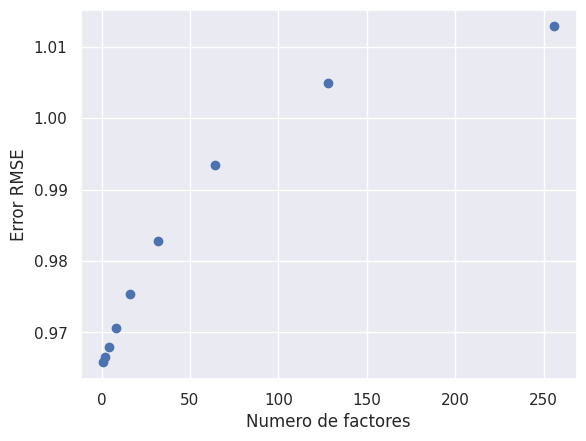

In [56]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

In [57]:
# Nuevamente, no apto para ansiosos

from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [5,50,100],'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data_surprise)

/home/printer/c/w/pi_ml_ops_api/eda_env/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [58]:

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9666164536371319
{'n_factors': 5, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


In [59]:
best_model = gs.best_estimator['rmse']
best_model

In [68]:
best_model.fit(trainset)

In [69]:
best_prediction = best_model.test(testset)

In [74]:
best_prediction[23]

Prediction(uid=36148, iid='ns1459', r_ui=3.5, est=3.6024268868312532, details={'was_impossible': False})

In [76]:
best_model.predict(1328945,28)

Prediction(uid=1328945, iid=28, r_ui=None, est=3.5334739449335375, details={'was_impossible': False})

# Save model

In [77]:
import pickle

In [78]:
pickle.dump(best_model, open("best_model.pkl", "wb"))


In [79]:
with open('best_model.pkl' , 'rb') as f:
    lr = pickle.load(f)

#lr.predict([[5000]]) 

In [80]:
lr.predict(1328945,28)

Prediction(uid=1328945, iid=28, r_ui=None, est=3.5334739449335375, details={'was_impossible': False})